# CAP 5768 - Data Science - Adam Corbin- Fall 2019

# Assignment 1: The Python data science stack 

### Goals 

- To get acquainted with Python and Jupyter notebooks.
- To acquire a basic understanding of the Python "data science stack" (NumPy, Pandas, Matplotlib).
- To have an early experience of manipulating, summarizing, and visualizing small datasets. 
- To demonstrate the ability to write Python code to answer questions and test hypotheses based on the contents of those datasets.


### Instructions

- This assignment is structured as a game, with three levels of increasing complexity.
- For each level, there will be some Python code to be written and questions to be answered.
- At the end, you should export your notebook to PDF format; it will "automagically" become your report.
- Submit the report (PDF), notebook (.ipynb file), and (optionally) link to the "live" version of your solution on Google Colaboratory via Canvas.
- The total number of points is 320 (plus up to 44 bonus points), distributed as follows: Level 1 (82 pts), Level 2 (70+ pts), Level 3 (132+ pts) and Conclusions (36 pts).

### Important

- It is OK to attempt the bonus points, but please **do not overdo it!** 
- Remember: this is an early exercise in exploring datasets; learning the syntax and "tricks" of Python, Jupyter notebooks, Numpy, Pandas, and Matplotlib; and writing code to test simple hypotheses and produce answers to simple questions that **you know you should be able to answer** because the answer can be pulled from the data.
- This is not (yet) the time to do sophisticated statistical analysis, train ML models, etc. 

------------
## Level 1: Presidents of the USA

The Python code below will load a dataset containing the names of the first 44 presidents of the USA and their heights, available in the file *president_heights.csv*, which is a simple comma-separated list of labels and values.

In [71]:
# Imports
import numpy as np
import pandas as pd
from pandas import DataFrame, Series

%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

from scipy.stats import pearsonr

In [72]:
file = 'data/president_heights.csv'
presidents = pd.read_csv(file) 
presidents

,order,name,height(cm)
0,1,George Washington,189
1,2,John Adams,170
2,3,Thomas Jefferson,189
3,4,James Madison,163
4,5,James Monroe,183
5,6,John Quincy Adams,171
6,7,Andrew Jackson,185
7,8,Martin Van Buren,168
8,9,William Henry Harrison,173
9,10,John Tyler,183


## Your turn! (8 points)

Write code to display the histogram (4 pts) of president's heights and compute summary statistics (4 pts): 

- Mean height
- Standard deviation
- Minimum height, and 
- Maximum height.

## Solution

In [73]:
heigth_col = presidents["height(cm)"]
print()

mean_heigth = round(heigth_col.mean(),3)
std_heigth = round(heigth_col.std(),3)
print("Mean\t\t\t" + str(mean_heigth))
print("Standard Deviation \t" + str(std_heigth))
print("Max\t\t\t" + str(heigth_col.min()))
print("Max\t\t\t" + str(heigth_col.max()))



Mean			179.738
Standard Deviation 	7.016
Max			163
Max			193


## Your turn! (18 points)

Write Python code to answer the following questions (make sure the messages displayed by your code are complete and descriptive enough):

1. Who was(were) the tallest president(s)?
2. Who was(were) the shortest president(s)?
3. How many presidents were 6' tall or taller?

## Solution

In [74]:
tallest_presidents = presidents[presidents["height(cm)"] == presidents["height(cm)"].max()]
smallest_presidents = presidents[presidents["height(cm)"] == presidents["height(cm)"].min()]
#1 foot = 30.48 cm
heigth_threshold = 6 * 30.48
six_feet_or_taller = presidents[presidents["height(cm)"] >= heigth_threshold]
print("Tallest Presidents")
print(tallest_presidents)
print("------------------")
print("Shortest Presidents")
print(smallest_presidents)
print("------------------")
print("Presidents >= 6ft(" + str(heigth_threshold) + "cm)")
print(six_feet_or_taller)

Tallest Presidents
    order               name  height(cm)
15     16    Abraham Lincoln         193
33     36  Lyndon B. Johnson         193
------------------
Shortest Presidents
   order           name  height(cm)
3      4  James Madison         163
------------------
Presidents >= 6ft(182.88cm)
    order                   name  height(cm)
0       1      George Washington         189
2       3       Thomas Jefferson         189
4       5           James Monroe         183
6       7         Andrew Jackson         185
9      10             John Tyler         183
14     15         James Buchanan         183
15     16        Abraham Lincoln         193
19     20      James A. Garfield         183
20     21      Chester A. Arthur         183
26     29      Warren G. Harding         183
29     32  Franklin D. Roosevelt         188
32     35        John F. Kennedy         183
33     36      Lyndon B. Johnson         193
35     38            Gerald Ford         183
37     40          Ronald

-------------

This is an extremely small, simple and manageable dataset. 

Let's use it to prove a silly hypotheses, for example: 

"H1: Even-numbered presidents are, in average, taller than odd-numbered ones." 

## Your turn! (24 points)

Write Python code to test hypothesis H1.

## Solution

In [75]:
# ENTER YOUR CODE HERE
even_average_heigth = round(presidents[presidents["order"] % 2 == 0]["height(cm)"].mean(),3)
odd_average_heigth = round(presidents[presidents["order"] % 2 == 1]["height(cm)"].mean(),3)
if(even_average_heigth > odd_average_heigth):
    print("H1 hypothesis is corret, Even presidents("+str(even_average_heigth) + ") are taller than Odd presidents("+str(odd_average_heigth)+ ")")
elif(even_average_heigth < odd_average_heigth):
    print("H1 hypothesis is false, Odd presidents("+str(odd_average_heigth)+ ") are taller than Even presidents("+str(even_average_heigth) + ")")
else:
    print("H1 hypothesis is false, Even and Odd presidents are about the same heigth at("+str(even_average_heigth) + ")")
    

H1 hypothesis is false, Odd presidents(179.864) are taller than Even presidents(179.6)


## Question 1 (4 points)

Was hypothesis H1 confirmed or refuted?

## Solution

The H1 is refuted since the Odd presidents heigths are on average 179.864cm and the Even presidents heigths are on average 179.6cm

---------------------

Now it's time for you to come up with a different (but also silly) hypotheses, which we will call H2. **Be creative!**

## Your turn! (28 points)

Write Python code to test hypothesis H2 (and some text to explain whether it was confirmed or not).

"H2: Presidents with more vowels are taller than ones with less vowels" 

For consistancy a the vouel set will be [a, e, i, o, u]

## Solution

In [76]:
#Get vouel count for each president, group them by vouel count, find if there is a coorolation between the groups
president_vouel_count = []
president_vouel_count_list = []
vouels = ['a','e','i','o','u']

# Collecting the vouel counts & then adding them to the DataTable
for p in presidents["name"]:
    count = 0
    for v in vouels:
        count += p.count(v)
    president_vouel_count.append(count)
presidents["vouel count"]  = president_vouel_count

#Grouping presidents by vouel count
average_heights_per_vouel_count = [0]*10 # Index will be considered vouel count
for vouel_count in range(0,10):
    group_pres = presidents[presidents["vouel count"] == vouel_count]
    print("Vouel count ", vouel_count)
    
    if len(group_pres) > 0:
        avg = group_pres["height(cm)"].mean()
        average_heights_per_vouel_count[vouel_count] = avg
        print("Average heigth: " , avg)
#         print(group_pres) ## Uncomment this line to see the group of presidents
    else:
        print("None")
print(average_heights_per_vouel_count)        




Vouel count  0
None
Vouel count  1
None
Vouel count  2
Average heigth:  175.33333333333334
Vouel count  3
Average heigth:  181.8
Vouel count  4
Average heigth:  182.125
Vouel count  5
Average heigth:  178.0
Vouel count  6
Average heigth:  181.0
Vouel count  7
Average heigth:  173.0
Vouel count  8
Average heigth:  178.0
Vouel count  9
None
[0, 0, 175.33333333333334, 181.8, 182.125, 178.0, 181.0, 173.0, 178.0, 0]


### Evaluation of H2
In general more vouels doesnt not mean a taller president. The tallest average had 5 vouels where the shortest average was 8 vouels. There was a tendency that the lower number of vouels equated to a taller president but not in all cases. In the end H2 was refuted 

-------------------
## Level 2: HR payroll

The Python code below will load a dataset containing the salaries and demographic data of more than 1000 employees of a hypothetical company, available in the file *salaries.csv*, which is a simple comma-separated list of labels and values.

In [77]:
salaries = pd.read_csv('data/salaries.csv') 
print(salaries.shape)
print(salaries.count())

(1192, 6)
earn      1192
height    1192
sex       1192
ed        1192
age       1192
race      1192
dtype: int64


## Question 2 (6 points)

What is the meaning of each of the six variables/features stored along the columns of the dataset?

## Solution

## Definitions below
earn - Income per year for an individual but not specified if its gross or net

heigth - The heigth of the person that I presume is measured inches

sex - Identification if the person is a male or female

ed - Education level assuming number of years where 12 is highschool, 16 is bachelor's degree and anything more is graduate

age - How old the indivdual is in years

race - Identificaiton of race if the individual gave it


--------------------

Let's explore the dataset by plotting some graphs and displaying summary statistics. 

The code below should display:
- Min, max, average, and median salary (global)
- A histogram of salaries
- A scatterplot correlating salaries and years of education
- The (Pearson) correlation coefficient between the two variables.

This should help us get started.

In [78]:
salary = np.array(salaries['earn'])
print("Salary statistics")
print("Minimum salary (global):", np.min(salary))
print("Maximum salary (global):", np.max(salary))
print("Average salary (global):", np.mean(salary))
print("Median  salary (global):", np.median(salary))

Salary statistics
Minimum salary (global): 200.0
Maximum salary (global): 200000.0
Average salary (global): 23154.773489932886
Median  salary (global): 20000.0


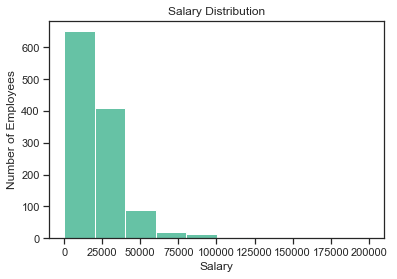

In [79]:
plt.hist(salary)
plt.title('Salary Distribution')
plt.xlabel('Salary')
plt.ylabel('Number of Employees');

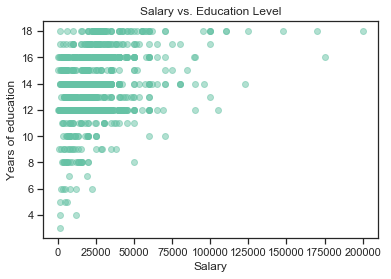

In [80]:
years = np.array(salaries['ed'])
plt.title('Salary vs. Education Level')
plt.xlabel('Salary')
plt.ylabel('Years of education');
plt.scatter(salary, years, alpha=0.5)
plt.show()

In [81]:
# Compute Pearson coefficient
from scipy.stats import pearsonr
corr, _ = pearsonr(salary,years)
print('Correlation coefficient: ',corr)

Correlation coefficient:  0.3399765246894845


The Pearson correlation coefficient (a value between -1 and 1) can be used to summarize the strength of the linear relationship between two data samples.

A simplified way to interpret the result is:
- A value of 0 means no correlation
- Values below -0.5 or above 0.5 indicates a notable (negative/positive) correlation

## Your turn! (16+ points)

Write code to:

1. Display the total headcount and the number (and %) of male and female employees. (4 pts)
2. Compute and display the min, max, average, and median salary *per gender*. (12 pts)
3. (OPTIONAL) Plot meaningful graphs that could provide insight into the gender inequality (*if any is present*) associated with the salaries in the company. (<= 16 bonus points)


## Solution

--Head counts--
|	Sex	|	Count	|	%	|
|	male	|	505	|	42.37	|
|	female	|	687	|	57.63	|
----------
Male statistics
Minimum salary: 1000.0
Maximum salary: 200000.0
Average salary: 29786.13
Median  salary: 25000.0
----------
Female statistics
Minimum salary: 200.0
Maximum salary: 123000.0
Average salary: 18280.2
Median  salary: 15000.0



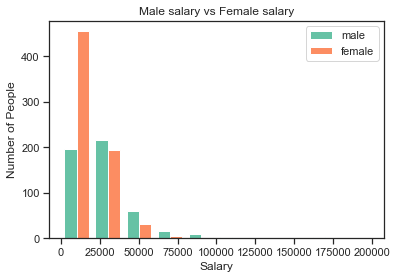

In [108]:
# ENTER YOUR CODE HERE
total_count = len(salaries)
males = salaries[salaries['sex'] == "male"]
male_count = len(males)
females = salaries[salaries['sex'] == "female"]
female_count = len(females)
print("--Head counts--")
print("|\tSex\t|\tCount\t|\t%\t|")
print("|\tmale\t|\t" + str(male_count) + "\t|\t" + str(round(male_count/total_count*100,2))+"\t|")
print("|\tfemale\t|\t" + str(female_count) + "\t|\t" + str(round(female_count/total_count*100,2))+"\t|")
print("----------")
print("Male statistics")
print("Minimum salary:", males["earn"].min())
print("Maximum salary:", males["earn"].max())
print("Average salary:", round(males["earn"].mean(),2))
print("Median  salary:", males["earn"].median())
print("----------")
print("Female statistics")
print("Minimum salary:", females["earn"].min())
print("Maximum salary:", females["earn"].max())
print("Average salary:", round(females["earn"].mean(),2))
print("Median  salary:", females["earn"].median())
print()

## Add in pretty graph for bonus points
# 2 histogram plots, but joined together
male_salary_array = np.array(males['earn'])
female_salary_array = np.array(females['earn'])

combined_2d_array = [male_salary_array,female_salary_array]
plt.title('Male salary vs Female salary')
plt.xlabel('Salary')
plt.ylabel('Number of People');
label = ["male", "female"]
plt.hist(combined_2d_array, histtype='bar', label=label)
plt.legend(loc='upper right');
plt.show()



--------------------

As you can possibly tell by now, this dataset may help us test hypotheses and answer questions related to possible sources of inequality associated with the salary distribution: gender, age, race, height. 

Let's assume, for the sake of argument, that the number of years of education should correlate well with a person's salary (this is clearly a weak argument and the plot and Pearson correlation coefficient computation above suggests that this is *not* the case) and that other suspiciously high (positive or negative) correlations could be interpreted as a sign of inequality.

---------------------

At this point, formulate 3 different hypotheses that might suggest that the salary distribution is biased by factors such as ageism. 

Call these hypotheses H3, H4, and H5. 

**Be creative, but realistic! These should be reasonable hypotheses, not silly ones!**

## Your turn! (48+ points)

Write Python code to test hypotheses H3, H4, and H5 (and some text to explain whether they were confirmed or not). Feel free to (also) use plots, but make your code independent of a human being interpreting those plots. (16 pts per hypothesis with additional <= 8 bonus points per hypotheses).  

# Hypotheses 
## H3 Age Vs salary
People who are older will earn more than younger people

## H4 Race Vs salary
People who are white will earn more than other races

## H5 Heigth Vs salary
People who are taller will earn more for both male and female

## H6 Education vs Sex
Males have more education background than Females

## Solution

H3


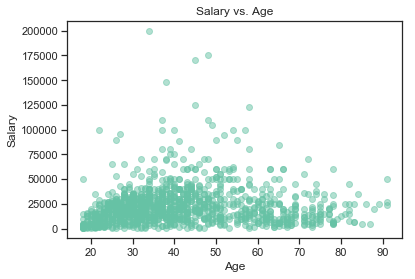

Correlation coefficient:  0.08100297364190615


In [83]:
# ENTER YOUR CODE HERE
print("H3")
ages = np.array(salaries['age'])
plt.title('Salary vs. Age')
plt.ylabel('Salary')
plt.xlabel('Age');
plt.scatter(ages, salary , alpha=0.5)
plt.show()
corr, _ = pearsonr(salary,ages)
print('Correlation coefficient: ',corr)


### H3 evaluation

Based on the graph there seems to be a tendency the lower incomes cluster around the lower
age and higher incomes for older people, but its pretty busy to definitely state that. The pearson correlation coefficient resulted
in ~ 0.081 and since that is greater than 0.5 then its showing strengths of a positive corrolation. Based on these
results I will say we can confim H3

H4
Black Statistics
Race count(percentage): 112 (9.4)
Minimum salary: 600.0
Maximum salary: 60000.0
Average salary: 19624.21
Median  salary: 20000.0
Standard Deviation: 11947.74

Hispanic Statistics
Race count(percentage): 66 (5.54)
Minimum salary: 1400.0
Maximum salary: 55000.0
Average salary: 18263.64
Median  salary: 16000.0
Standard Deviation: 12832.53

Other Statistics
Race count(percentage): 25 (2.1)
Minimum salary: 3000.0
Maximum salary: 110000.0
Average salary: 23096.64
Median  salary: 20000.0
Standard Deviation: 21790.8

White Statistics
Race count(percentage): 989 (82.97)
Minimum salary: 200.0
Maximum salary: 200000.0
Average salary: 23882.47
Median  salary: 20000.0
Standard Deviation: 20374.73



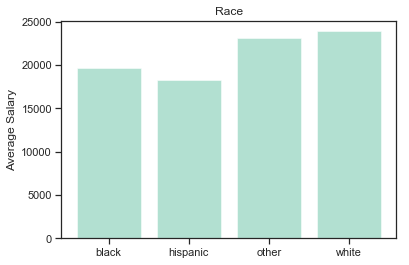

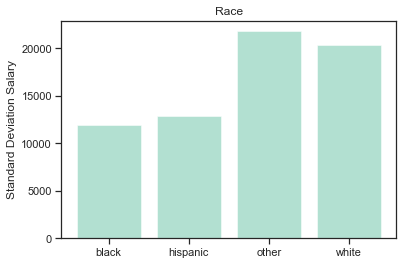

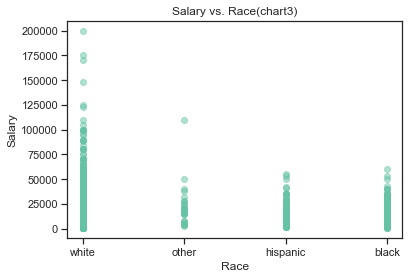

In [112]:
print("H4")
races = np.array(salaries['race'])
total_count = len(races)
unique_races = list(set(races))
labels = []
# Loop over all the races, collect their salaries so we can have a bargraph
collected_race_earn_data = []
average_data = []
std_data = []
for race in unique_races:
    specific_race_earn_data = salaries[salaries['race'] == race]["earn"]
    print(race.capitalize() +" Statistics")
    size = len(specific_race_earn_data)
    print("Race count(percentage):", size, "(" + str(round(size/total_count * 100,2))  + ")")
    print("Minimum salary:", specific_race_earn_data.min())
    print("Maximum salary:", specific_race_earn_data.max())
    average = round(specific_race_earn_data.mean(),2)
    average_data.append(average)
    print("Average salary:", average)
    print("Median  salary:", specific_race_earn_data.median())
    std = round(specific_race_earn_data.std(),2)
    std_data.append(std)
    print("Standard Deviation:", std)
    print()
    collected_race_earn_data.append(specific_race_earn_data)



plt.title('Average Salary vs. Race (chart1)')
y_pos = np.arange(len(unique_races))
plt.bar(y_pos, average_data, align='center', alpha=0.5)
plt.xticks(y_pos, unique_races)
plt.ylabel('Average Salary')
plt.title('Race')
plt.show()


plt.title('Standard Deviation Salary vs. Race(chart2)')
y_pos = np.arange(len(unique_races))
plt.bar(y_pos, std_data, align='center', alpha=0.5)
plt.xticks(y_pos, unique_races)
plt.ylabel('Standard Deviation Salary')
plt.title('Race')
plt.show()

plt.title('Salary vs. Race(chart3)')
plt.ylabel('Salary')
plt.xlabel('Race');
plt.scatter(races, salary , alpha=0.5)
plt.show()


### H4 evaluation
First off taking a look at the percent spread between different races there was an 82% of the survey was white. We might state that this might be too small of a sample size with not a good amount of ratio between the different races

Moving on to the evaluation, we can see the average salary at chart1 by race goes from high to low as follows [white: 23882.47, other: 23096.64, black: 19624.21, Hispanic: 18263.64]. Looking at the averages this starts to lean towards H3 being plausable. 

Taking a look at the Standard Deviation chart2 it shows a little different order [ other: 21790.8, white:20374.73, Hispanic: 12832.53, black: 11947.74]. We see other is taking over the lead for this comparison. 

Observing the scatter plot chart3 of all the salaries split by rance you can see the custering of white to be higher than all of the other races.

Based on the data observed and with the caveat that the sample distribution was not good, I would say H4 is plausable. I dont think we can fully confirm or reject H3 based on the data. I would reccomend further investigation to get a better dataset.

H5


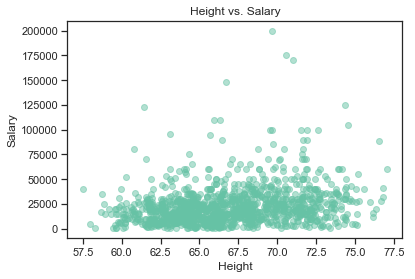

Correlation coefficient:  0.2418481495362671


In [116]:
print("H5")
ages = np.array(salaries['height'])
plt.title('Height vs. Salary')
plt.xlabel('Height')
plt.ylabel('Salary');
plt.scatter(ages, salary , alpha=0.5)
plt.show()
corr, _ = pearsonr(salary,ages)
print('Correlation coefficient: ',corr)

### H5 evaluation
For H5 we are looking to see if there is any coorlation between someones heigth and their salary. From the scatter plot there is clustering between a heigth of 60 to 72 and salary ~4,000 to 45,000, but this is just one large cluster. From the human eye I dont see any seperation between the groups. The Pearson correlation coefficient is showing a result of 0.2418 which is inbetween -0.5 and 0.5 which shows an extreamly weak correlation between the two attributes
Based on these results I can refute H5

In [ ]:
print("H6") #TODO maybe

In [ ]:
H6 evaluation

-------------------
## Level 3: Fuel consumption

The Python code below will load a dataset containing fuel consumption data for ~400 vehicles produced in the 1970s and the 1980s along with some characteristic information associated with each model. 

Here, *displacement* refers to a vehicle's engine size and the fuel efficiency is measured in miles per gallon (mpg).

See:
https://archive.ics.uci.edu/ml/datasets/Auto+MPG for additional information.

In [16]:
sns.set(style='ticks', palette='Set2')
%matplotlib inline

data = pd.read_csv("http://archive.ics.uci.edu/ml/machine-learning-databases/auto-mpg/auto-mpg.data-original",
                   delim_whitespace = True, header=None,
                   names = ['mpg', 'cylinders', 'displacement', 'horsepower', 'weight', 'acceleration',
                            'model', 'origin', 'car_name'])
print(data.shape)

(406, 9)


In [17]:
data.dropna(inplace=True)
data.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model,origin,car_name
0,18.0,8.0,307.0,130.0,3504.0,12.0,70.0,1.0,chevrolet chevelle malibu
1,15.0,8.0,350.0,165.0,3693.0,11.5,70.0,1.0,buick skylark 320
2,18.0,8.0,318.0,150.0,3436.0,11.0,70.0,1.0,plymouth satellite
3,16.0,8.0,304.0,150.0,3433.0,12.0,70.0,1.0,amc rebel sst
4,17.0,8.0,302.0,140.0,3449.0,10.5,70.0,1.0,ford torino


## Question 3 (6 points)

What was the net effect of the line of code

``data.dropna(inplace=True)``?

## Solution

(ENTER YOUR ANSWER HERE)

## Your turn! (18+ points)

Write code to:

1. Count the number of 3- and 5-cylinder vehicles in the dataset, display the count, and discard those entries (rows). (12 pts)
2. Compute and display the min, max, and average fuel consumption (in mpg) for 4-, 6-, and 8-cylinder vehicles. (6 pts)
3. (OPTIONAL) Display the name of the most and least fuel efficient vehicles in the dataset (<= 4 points)


## Solution

In [18]:
# ENTER YOUR CODE HERE
# ...
# ...
# ...

--------------------

This dataset may help us test hypotheses and answer questions related to fuel consumption. 

To get started: Which features of a vehicle correlate best with its mpg --  *displacement*, *weight*, or *horsepower*?

## Your turn! (48 points)

Write Python code to plot the relationship between:

1. Fuel consumption and displacement (engine size)
2. Fuel consumption and weight
3. Fuel consumption and horsepower (HP)


## Solution

In [19]:
# ENTER YOUR CODE HERE
# ...
# ...
# ...

## Questions 4-6 (30 points, i.e. 10 points each)

For each of the three cases above, use the plots to answer the questions below:

4. Is there a correlation between mpg and displacement? If so: is it positive or negative? linear or non-linear?
5. Is there a correlation between mpg and weight? If so: is it positive or negative? linear or non-linear?
6. Is there a correlation between mpg and horsepower? If so: is it positive or negative? linear or non-linear?



## Solution

(ENTER YOUR ANSWERS HERE)

## Questions 7-8 (30 points, i.e. 15 points each)

Write Python code to produce (box)plots that should provide good answers the questions below:

7. Did vehicles get more efficient over the years (represented in this dataset, i.e., 1970 through 1982)?
8. Are Japanese cars more fuel efficient than American or European ones?

Hint: 

``data['Country_code'] = data.origin.replace([1,2,3],['USA','Europe','Japan'])``



## Solution

In [20]:
# ENTER YOUR CODE HERE
# ...
# ...
# ...

## Conclusions (36 points)

Write your conclusions and make sure to address the issues below:
- What have you learned from this assignment?
- Which parts were the most fun, time-consuming, enlightening, tedious?
- What would you do if you had an additional week to work on this?

## Solution

(WRITE YOUR CONCLUSIONS HERE)